In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
# load thyroid database
data = pd.read_csv('new-thyroid.csv')
data.sample(n=5)

,Class,1,2,3,4,5
72,1,133,9.7,2.9,0.8,1.9
2,1,127,12.9,2.4,1.4,0.6
99,1,108,10.9,1.2,1.9,1.0
197,3,126,0.5,0.2,12.2,8.8
86,1,119,11.4,2.3,2.2,1.6


In [23]:
data.groupby('Class').Class.count()

Class
0    150
1     35
2     30
Name: Class, dtype: int64

In [3]:
data.describe()

,Class,1,2,3,4,5
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1.441860,109.595349,9.804651,2.050233,2.880000,4.199070
std,0.726737,13.145447,4.697362,1.419486,6.118031,8.070519
min,1.000000,65.000000,0.500000,0.200000,0.100000,-0.700000
25%,1.000000,103.000000,7.100000,1.350000,1.000000,0.550000
50%,1.000000,110.000000,9.200000,1.700000,1.300000,2.000000
75%,2.000000,117.500000,11.300000,2.200000,1.700000,4.100000
max,3.000000,144.000000,25.300000,10.000000,56.400000,56.300000


In [4]:
#Normalize the data
data.Class = data.Class.astype('str')
data['Class'].replace(['1', '2', '3'], [0, 1, 2], inplace=True)
df_norm = data[['1', '2', '3', '4', '5']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,1,2,3,4,5
15,0.556962,0.318548,0.193878,0.017762,0.075439
24,0.708861,0.387097,0.153061,0.021314,0.014035
153,0.000000,1.000000,0.571429,0.021314,0.015789
202,0.607595,0.185484,0.051020,0.101243,0.356140
143,0.670886,0.471774,0.132653,0.015986,0.052632


In [5]:
df_norm.describe()

,1,2,3,4,5
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.564498,0.375188,0.188799,0.049378,0.085949
std,0.166398,0.189410,0.144846,0.108668,0.141588
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.481013,0.266129,0.117347,0.015986,0.021930
50%,0.569620,0.350806,0.153061,0.021314,0.047368
75%,0.664557,0.435484,0.204082,0.028419,0.084211
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Convert the Class labels to indexes for use with neural network.
target = data[['Class']]
target.sample(n=5)

,Class
167,1
39,0
80,0
54,0
40,0


In [7]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,1,2,3,4,5,Class
81,0.329114,0.302419,0.153061,0.035524,0.092982,0
121,0.417722,0.399194,0.142857,0.039076,0.000000,0
58,0.518987,0.435484,0.163265,0.014210,0.029825,0
202,0.607595,0.185484,0.051020,0.101243,0.356140,2
200,0.873418,0.060484,0.030612,0.214920,0.050877,2


In [8]:
#Mark some of the data for testing purpose.
#We'll test our network on unseen data.
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,1,2,3,4,5,Class,train
176,0.139241,1.000000,0.438776,0.019538,0.010526,1,False
68,0.607595,0.427419,0.153061,0.012433,0.052632,0,True
60,0.481013,0.306452,0.122449,0.007105,0.078947,0,True
204,0.696203,0.116935,0.163265,0.131439,0.389474,2,True
140,0.506329,0.209677,0.081633,0.014210,0.028070,0,True


In [9]:
#Separate train and test Data
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
# train.sample(n=5)
train

,1,2,3,4,5,Class
142,0.594937,0.241935,0.102041,0.019538,0.047368,0
79,0.658228,0.250000,0.204082,0.030195,0.129825,0
208,0.873418,0.056452,0.040816,0.325044,0.156140,2
5,0.506329,0.225806,0.193878,0.023091,0.135088,0
118,0.582278,0.322581,0.142857,0.017762,0.080702,0
...,...,...,...,...,...,...
165,0.430380,0.504032,0.346939,0.010657,0.010526,1
137,0.784810,0.290323,0.163265,0.031972,0.124561,0
103,0.506329,0.262097,0.132653,0.046181,0.087719,0
143,0.670886,0.471774,0.132653,0.015986,0.052632,0


In [10]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
# test.sample(n=5)
test

,1,2,3,4,5,Class
0,0.531646,0.387097,0.204082,0.014210,0.059649,0
11,0.569620,0.435484,0.214286,0.014210,0.070175,0
24,0.708861,0.387097,0.153061,0.021314,0.014035,0
42,0.810127,0.459677,0.255102,0.019538,0.073684,0
51,0.481013,0.471774,0.102041,0.021314,0.059649,0
52,0.632911,0.306452,0.153061,0.008881,0.050877,0
56,0.354430,0.338710,0.132653,0.012433,0.059649,0
63,0.645570,0.383065,0.153061,0.024867,0.087719,0
66,0.670886,0.403226,0.193878,0.010657,0.073684,0
69,0.493671,0.233871,0.183673,0.019538,0.082456,0


In [11]:
X = train.values[:,:5]
X[:5]

array([[0.59493671, 0.24193548, 0.10204082, 0.01953819, 0.04736842],
       [0.65822785, 0.25      , 0.20408163, 0.03019538, 0.12982456],
       [0.87341772, 0.05645161, 0.04081633, 0.3250444 , 0.15614035],
       [0.50632911, 0.22580645, 0.19387755, 0.02309059, 0.13508772],
       [0.58227848, 0.32258065, 0.14285714, 0.01776199, 0.08070175]])

In [12]:
targets = [[1,0,0], [0,1,0], [0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,5:6]])
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [13]:
#Create backpropagating neural network
#Create 3 layers: Input, hidden and Output.
#Inputs = length and widths of the species
#Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa
#w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.
#Weight are randomized between -1 and 1.

num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594],
       [-0.12770671,  0.89795461,  0.57261197,  0.7325786 , -0.65366916]])

In [14]:
#w2 are the weights of connections between hidden layer and output layer.
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.85010283,  0.20148544, -0.66405563],
       [ 0.46676034, -0.18311228,  0.05581765],
       [ 0.87514317,  0.04339224, -0.78361323],
       [-0.68355319,  0.0904053 ,  0.04880816],
       [ 0.27522049, -0.19700911,  0.29961022]])

In [15]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)


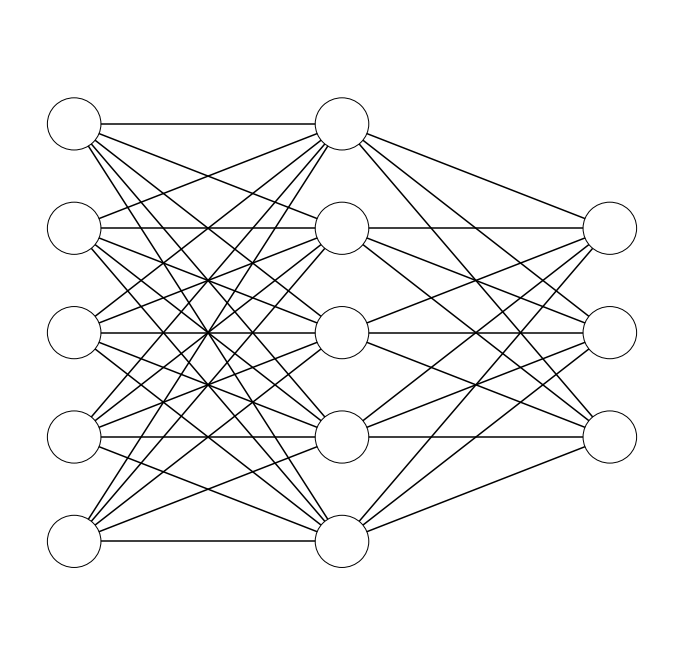

In [16]:

#A Graphical representations of our network will be something like below
#The first set of 5 nodes is the input.
#The second set of 5 nodes is the hidden layer.
#The last set of 3 nodes is the output layer.
#All the nodes of a layer are fully connected to all nodes of the next layer.

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [5, 5, 3])

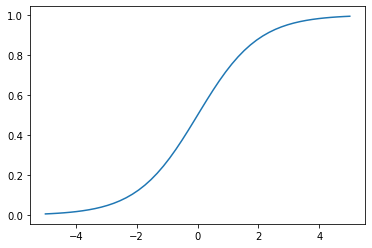

In [17]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [18]:
learning_rate = 0.1 # slowly update the network
for epoch in range(1000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    er = (abs(y - l2)).mean()
    l2_delta = (y - l2)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)

Error: 0.043207919379634085


In [19]:
#Test the network for accuracy.
#Run the network with the updated weights from training.

X = test.values[:,:5]
y = np.array([targets[int(x)] for x in test.values[:,5:6]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0.936, 0.021, 0.   ],
       [0.914, 0.032, 0.   ],
       [0.989, 0.001, 0.001],
       [0.983, 0.002, 0.001],
       [0.914, 0.043, 0.   ],
       [0.989, 0.   , 0.005],
       [0.936, 0.033, 0.   ],
       [0.99 , 0.   , 0.003],
       [0.984, 0.002, 0.001],
       [0.954, 0.   , 0.009],
       [0.975, 0.002, 0.002],
       [0.989, 0.001, 0.003],
       [0.988, 0.   , 0.003],
       [0.984, 0.   , 0.015],
       [0.995, 0.   , 0.005],
       [0.975, 0.   , 0.05 ],
       [0.004, 0.997, 0.   ],
       [0.006, 0.997, 0.   ],
       [0.001, 0.   , 0.993],
       [0.004, 0.   , 0.994],
       [0.003, 0.   , 0.991]])

In [20]:
yp = np.argmax(l2, axis=1) # prediction
sample_test = np.argmax(y, axis=1)
res = yp == sample_test
correct = np.sum(res)/len(res)

testres = test[['Class']].replace([0, 1, 2], ['1', '2', '3'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0, 1, 2], ['1', '2', '3'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

    Class Prediction
0       1          1
11      1          1
24      1          1
42      1          1
51      1          1
52      1          1
56      1          1
63      1          1
66      1          1
69      1          1
77      1          1
97      1          1
105     1          1
119     1          1
127     1          1
146     1          1
164     2          2
176     2          2
193     3          3
200     3          3
202     3          3
Correct: 21 / 21 : 100.0 %


In [21]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = ['1', '2', '3']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0, 1, 2]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[16  0  0]
 [ 0  2  0]
 [ 0  0  3]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


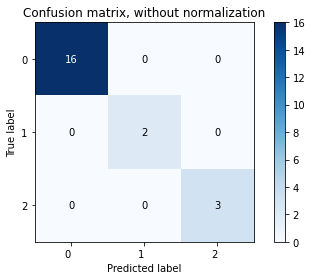

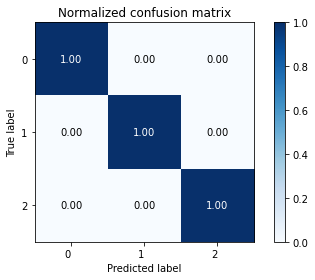

In [22]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(sample_test, yp, classes=class_names, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(sample_test, yp, classes=class_names , normalize=True,
                      title='Normalized confusion matrix')

plt.show()